# Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import layers,Sequential,Model,utils
import tensorflow_hub as hub
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Defining the path of dataset

In [3]:
# Leaves 132 folders
dataset_path = r"A:\sih\DISEASED INDENTIFICATION\DATA"

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    channel_shift_range=20,
    fill_mode='nearest',
    rescale=1./255,
    # validation_split=0.1
)

data_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Adjust to your image size
    batch_size=16,
    class_mode='sparse',  # Use 'binary' for binary classification
    seed=42,  # Optional random seed for reproducibility
    subset='training' # Specify 'training' or 'validation' for the subset
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'A:\\sih\\DISEASED INDENTIFICATION\\DATA'

In [4]:
# Access the class labels and their corresponding numeric values
class_labels = data_generator.class_indices
print(class_labels)

import pickle
with open('labels_leaf_new.pkl', 'wb') as file:
    pickle.dump(class_labels, file)

{'Alstonia Scholaris, status - diseased': 0, 'Alstonia Scholaris, status - healthy': 1, 'Arjun, status - diseased': 2, 'Arjun, status - healthy': 3, 'Chinar, status - diseased': 4, 'Chinar, status - healthy': 5, 'Gauva, status - diseased': 6, 'Gauva, status - healthy': 7, 'Jamun, status - diseased': 8, 'Jamun, status - healthy': 9, 'Jatropha, status - diseased': 10, 'Jatropha, status - healthy': 11, 'Lemon, status - diseased': 12, 'Lemon, status - healthy': 13, 'Mango, status - diseased': 14, 'Mango, status - healthy': 15, 'Pomegranate, status - diseased': 16, 'Pomegranate, status - healthy': 17, 'Pongamia Pinnata, status - diseased': 18, 'Pongamia Pinnata, status - healthy': 19}


In [5]:
# Fetch the total number of images for training
total_training_images = data_generator.n
print("Total training images:", total_training_images)

Total training images: 4236


In [6]:
# Calculate the number of batches per epoch
num_batches_per_epoch = total_training_images // data_generator.batch_size

# Calculate the total number of augmented images per epoch
total_augmented_images_per_epoch = num_batches_per_epoch * data_generator.batch_size

print("Total augmented images per epoch:", total_augmented_images_per_epoch)


Total augmented images per epoch: 4224


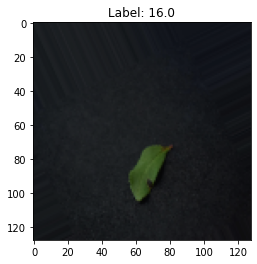

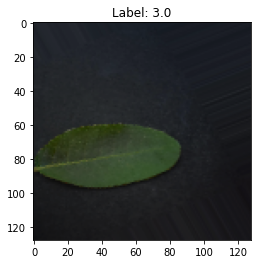

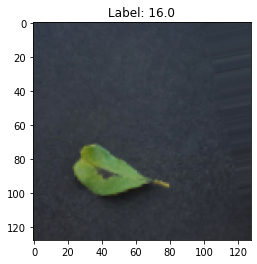

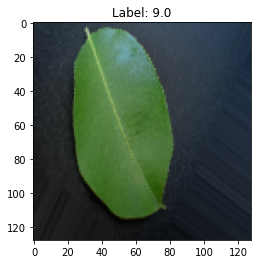

In [7]:
# Fetch and display some augmented images
images, labels = next(data_generator)  # Get a batch of augmented data
for i in range(4):  # Display the first 4 images
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.show()

# Lets make the model

In [10]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(128,128,3)
)

In [11]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(20,activation='softmax'))

conv_base.trainable = False

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 20)                2580      
                                                                 
Total params: 16,847,572
Trainable params: 2,132,884
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit_generator(data_generator, epochs=1)

C:\Users\aashi\AppData\Local\Temp\ipykernel_18628\3381621959.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=1)


265/265 [==============================] - 528s 2s/step - loss: 1.9957 - accuracy: 0.3654


In [16]:
# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Saved the model successfully


In [17]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=6)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Loaded the model successfully


C:\Users\aashi\AppData\Local\Temp\ipykernel_18628\2531923608.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=6)


Epoch 1/6
265/265 [==============================] - 473s 2s/step - loss: 1.4210 - accuracy: 0.5220
Epoch 2/6
265/265 [==============================] - 1444s 5s/step - loss: 1.3107 - accuracy: 0.5456
Epoch 3/6
265/265 [==============================] - 541s 2s/step - loss: 1.2091 - accuracy: 0.5715
Epoch 4/6
265/265 [==============================] - 549s 2s/step - loss: 1.1428 - accuracy: 0.6017
Epoch 5/6
265/265 [==============================] - 445s 2s/step - loss: 1.0720 - accuracy: 0.6237
Epoch 6/6
265/265 [==============================] - 477s 2s/step - loss: 1.0588 - accuracy: 0.6249
Training complete
Saved the model successfully


In [18]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Loaded the model successfully


C:\Users\aashi\AppData\Local\Temp\ipykernel_18628\2965345743.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=1)


265/265 [==============================] - 582s 2s/step - loss: 0.9784 - accuracy: 0.6508
Training complete
Saved the model successfully


In [19]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Loaded the model successfully


C:\Users\aashi\AppData\Local\Temp\ipykernel_18628\2965345743.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=1)


265/265 [==============================] - 479s 2s/step - loss: 0.9956 - accuracy: 0.6348
Training complete
Saved the model successfully


In [20]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Loaded the model successfully


C:\Users\aashi\AppData\Local\Temp\ipykernel_18628\2965345743.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=1)


265/265 [==============================] - 482s 2s/step - loss: 0.9629 - accuracy: 0.6556
Training complete
Saved the model successfully


In [14]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Loaded the model successfully


C:\Users\aashi\AppData\Local\Temp\ipykernel_18612\1571339475.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=1)


876/876 [==============================] - 695s 793ms/step - loss: 1.1221 - accuracy: 0.6650
Training complete
Saved the model successfully


In [12]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Loaded the model successfully


C:\Users\aashi\AppData\Local\Temp\ipykernel_5576\1685271989.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=3)


Epoch 1/3
876/876 [==============================] - 981s 1s/step - loss: 1.1270 - accuracy: 0.6593
Epoch 2/3
876/876 [==============================] - 867s 990ms/step - loss: 1.0888 - accuracy: 0.6728
Epoch 3/3
876/876 [==============================] - 845s 964ms/step - loss: 1.0618 - accuracy: 0.6819
Training complete
Saved the model successfully


In [12]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Loaded the model successfully


C:\Users\aashi\AppData\Local\Temp\ipykernel_20620\1685271989.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=3)


Epoch 1/3
876/876 [==============================] - 914s 1s/step - loss: 1.0471 - accuracy: 0.6876
Epoch 2/3
876/876 [==============================] - 878s 1s/step - loss: 1.0411 - accuracy: 0.6858
Epoch 3/3
876/876 [==============================] - 790s 902ms/step - loss: 1.0224 - accuracy: 0.6933
Training complete
Saved the model successfully


In [13]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

Loaded the model successfully


C:\Users\aashi\AppData\Local\Temp\ipykernel_20620\2721186827.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator, epochs=2)


Epoch 1/2
876/876 [==============================] - 755s 862ms/step - loss: 0.9957 - accuracy: 0.6974
Epoch 2/2
876/876 [==============================] - 828s 945ms/step - loss: 0.9971 - accuracy: 0.6976
Training complete
Saved the model successfully


In [ ]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

In [ ]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")

In [ ]:
# Load the model weights
model.load_weights('diseased_prediction.h5')
print("Loaded the model successfully")

# Train the model for more epochs
history = model.fit_generator(data_generator, epochs=1)
print("Training complete")

# Save the model weights
model.save_weights('diseased_prediction.h5')
print("Saved the model successfully")